# **Customer Retension and Churn Prediction**

## **Import necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

## **Load Data**

In [ ]:
data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
#helps display all columns from dataset
pd.set_option('display.max_columns', None)

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## **Domain knowledge**


| Column Name          | Description                                                     |
| -------------------- | --------------------------------------------------------------- |
| **customerID**       | Unique identifier for each customer                             |
| **gender**           | Customer gender: Male or Female                                 |
| **SeniorCitizen**    | Whether the customer is a senior citizen (1 = Yes, 0 = No)      |
| **Partner**          | Whether the customer has a partner (Yes/No)                     |
| **Dependents**       | Whether the customer has dependents (Yes/No)                    |
| **tenure**           | Number of months the customer has stayed with the company       |
| **PhoneService**     | Whether the customer has a phone service (Yes/No)               |
| **MultipleLines**    | Whether the customer has multiple phone lines                   |
| **InternetService**  | Type of internet service: DSL, Fiber optic, or No               |
| **OnlineSecurity**   | Whether the customer has online security add-on                 |
| **OnlineBackup**     | Whether the customer has online backup add-on                   |
| **DeviceProtection** | Whether the customer has device protection add-on               |
| **TechSupport**      | Whether the customer has tech support service                   |
| **StreamingTV**      | Whether the customer has streaming TV service                   |
| **StreamingMovies**  | Whether the customer has streaming movies service               |
| **Contract**         | Type of contract: Month-to-month, One year, Two year            |
| **PaperlessBilling** | Whether the customer is on paperless billing (Yes/No)           |
| **PaymentMethod**    | Payment method used (e.g., Electronic check, Credit card, etc.) |
| **MonthlyCharges**   | The amount charged to the customer monthly                      |
| **TotalCharges**     | The total amount charged to the customer to date                |
| **Churn**            | Whether the customer has churned (Yes/No)                       |


## **Exploratory Data Analysis**

In [ ]:
data.shape

(7043, 21)

In [ ]:
#checking data types:
data.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


Here we can see data type of `TotalCharges` is object which is not correct so we need to change it to Numeric for detail analysis

In [ ]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [ ]:
data['TotalCharges'].dtype

dtype('float64')

In [ ]:
data.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


Here `TotalCharges` contain null values so we can either remove it or else we can just replace it with the mean total charges but ill recommend removing will be better option.

In [ ]:
data.isnull().sum().sort_values(ascending=False)

,0
TotalCharges,11
gender,0
SeniorCitizen,0
Partner,0
customerID,0
Dependents,0
tenure,0
MultipleLines,0
PhoneService,0
OnlineSecurity,0


In [ ]:
data.dropna(subset=['TotalCharges'],inplace=True)

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


After removing the data is cleaned as no other column rather than `TotalCharges` have null values.

In [ ]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


## **Describe the data**

In [ ]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


## **Univariate Analysis**

In [ ]:
#Creating box Plot for numerical variable to identify outliers
col1 = ['tenure','MonthlyCharges','TotalCharges']

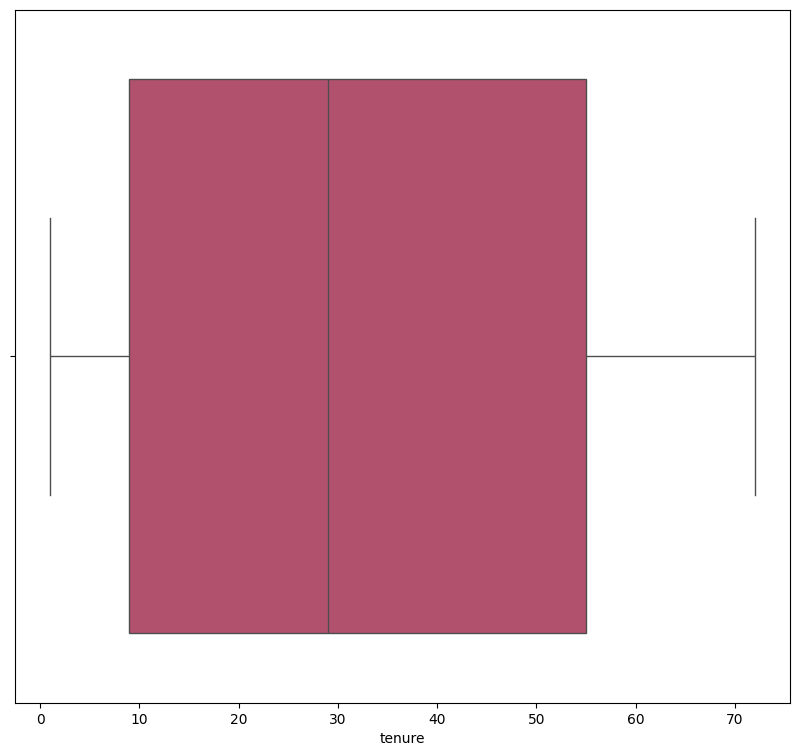

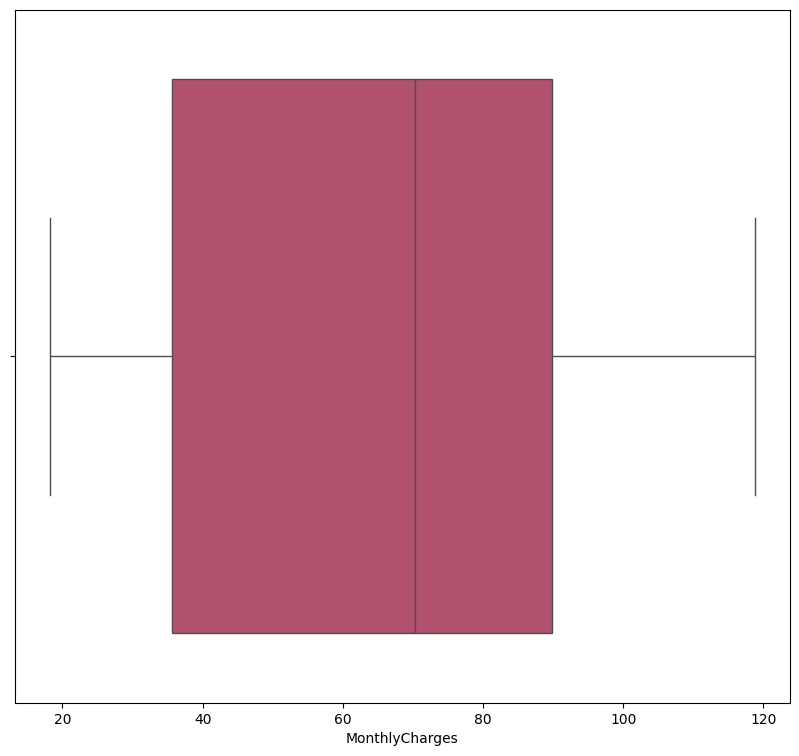

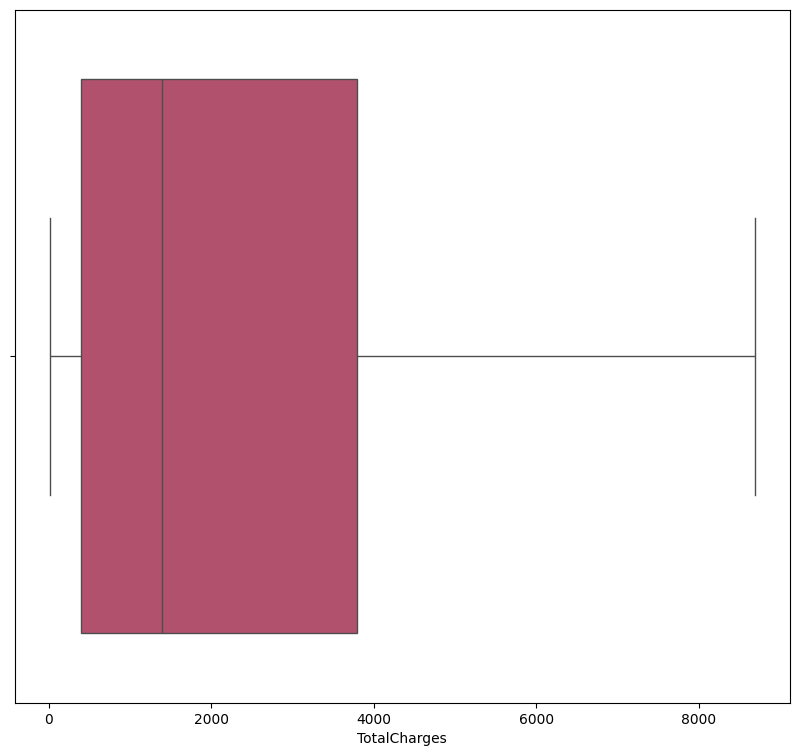

In [ ]:
for column in col1:
  plt.figure(figsize=(10,9))
  sns.boxplot(data=data, x=column, palette='flare')
  plt.show()

From the above diagrams which are boxplot for columns like `tenure`,`MonthlyCharges` and `TotalCharges` which help us identify outlier as from those diagram we can be sure that there are no outlier that we need to deal with this step is important to make sure that the further analysis is correct.

In [ ]:
col = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']

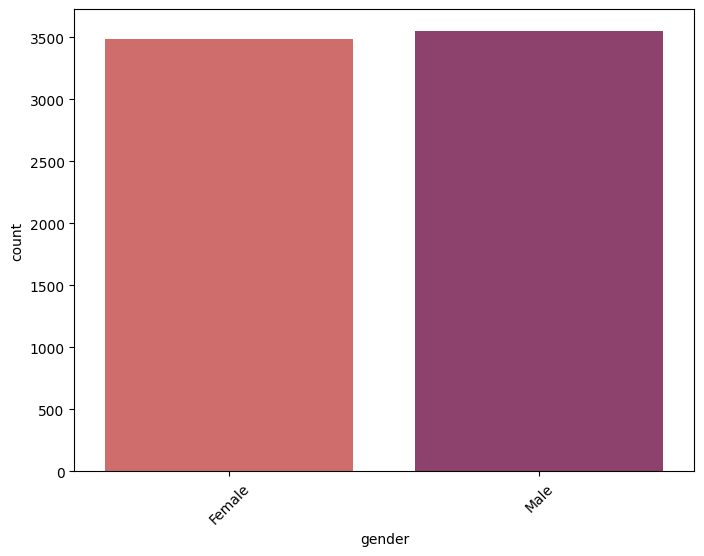

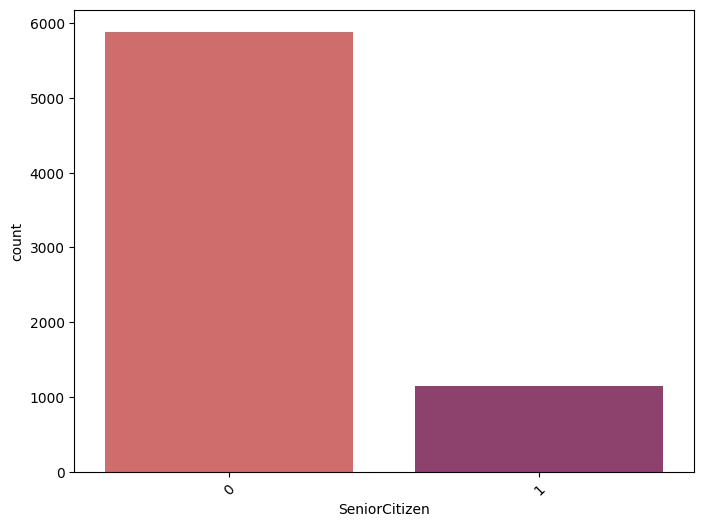

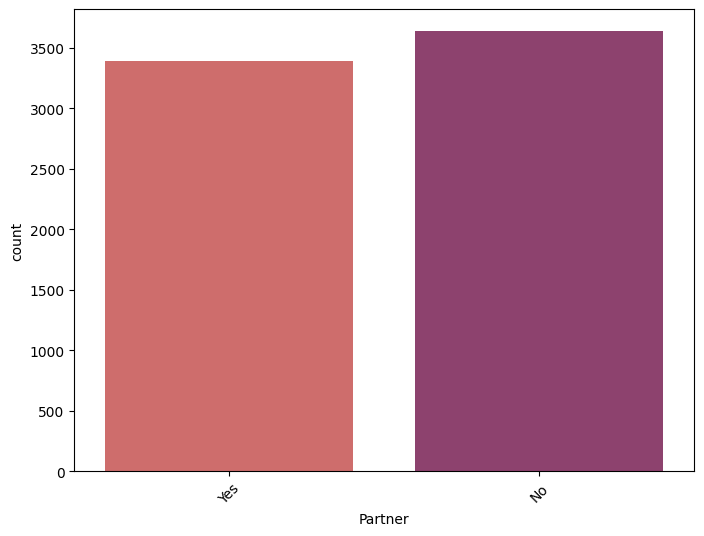

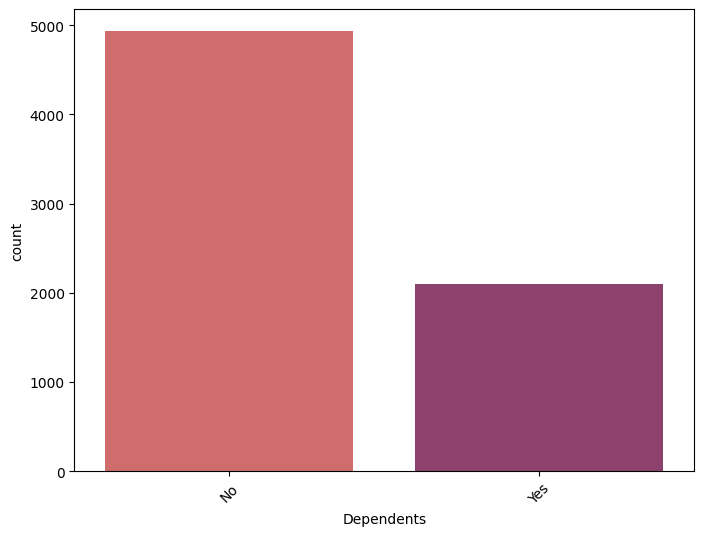

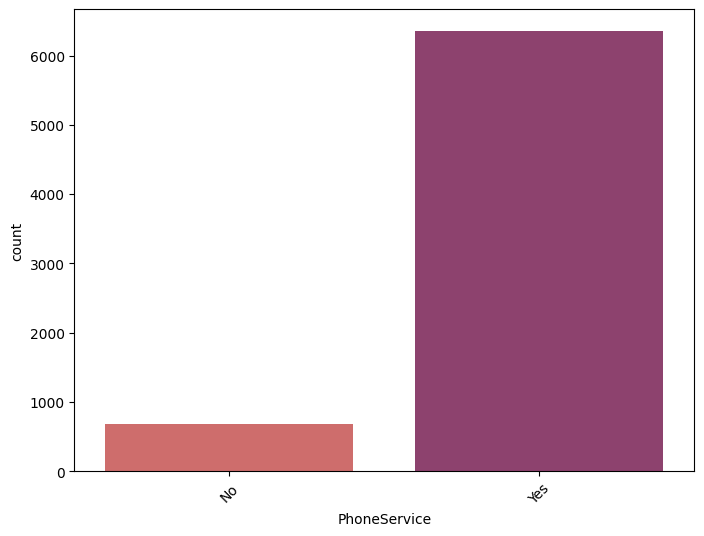

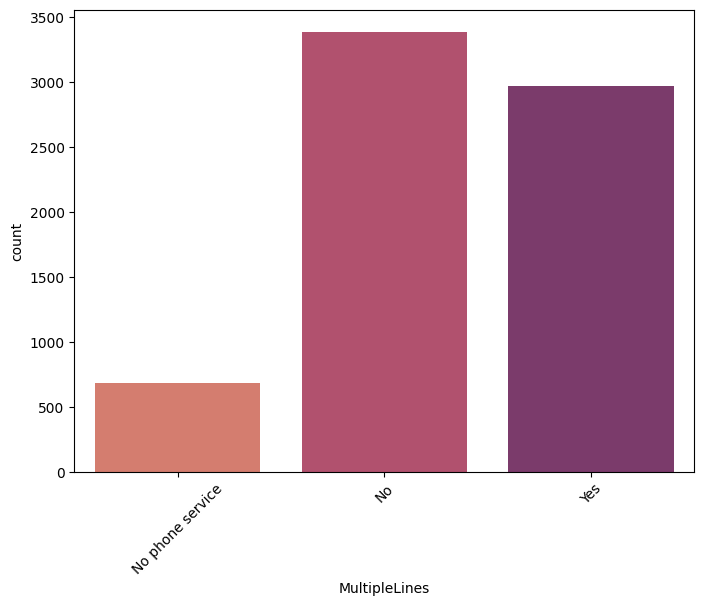

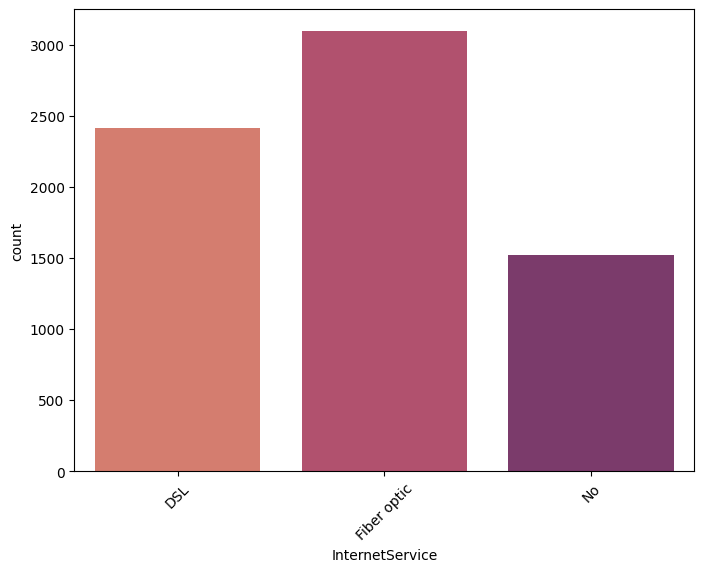

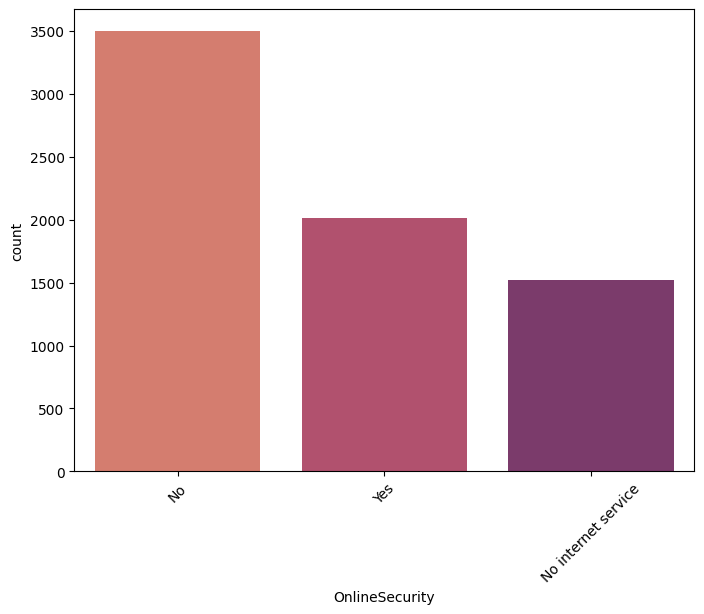

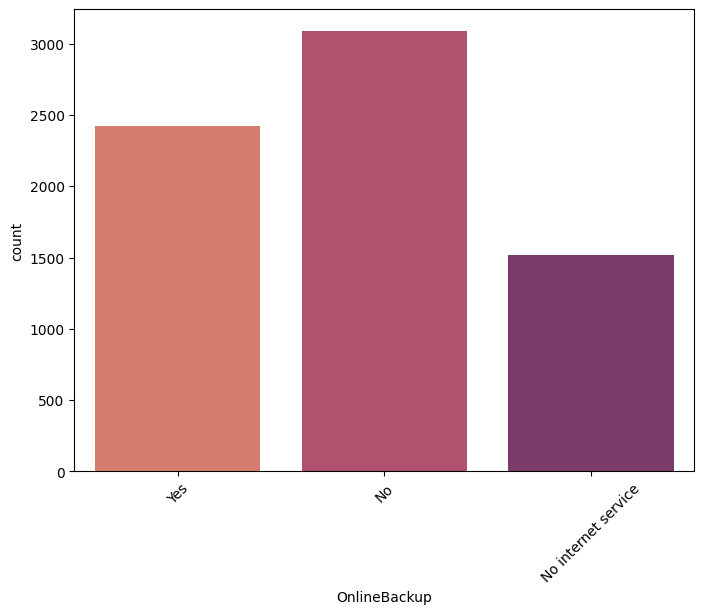

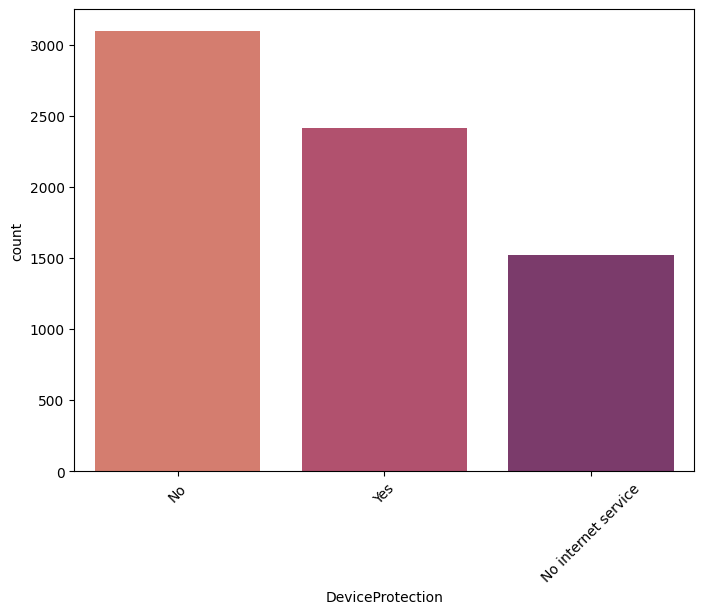

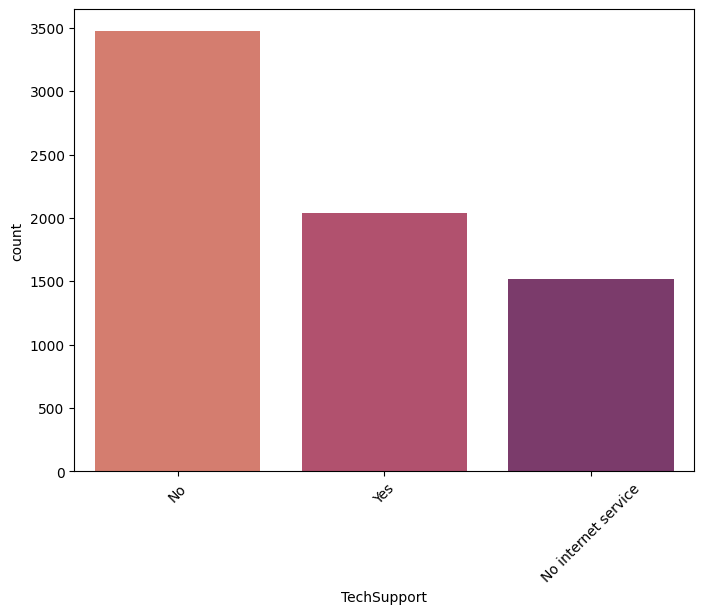

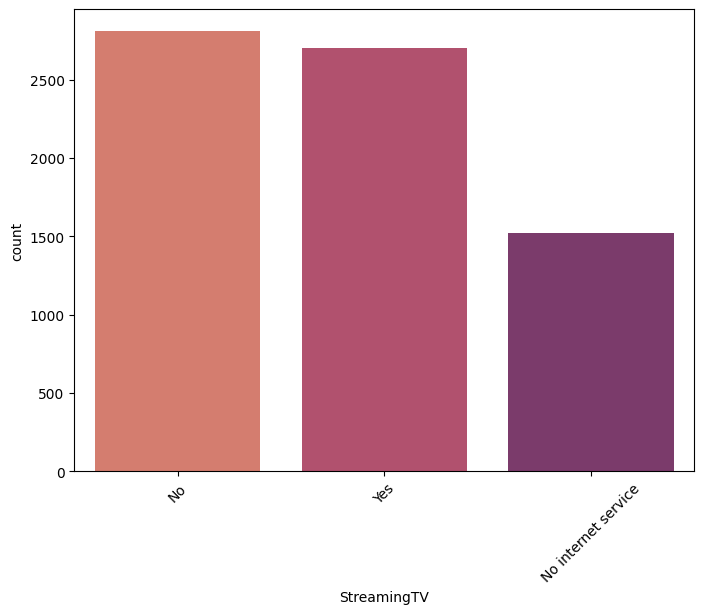

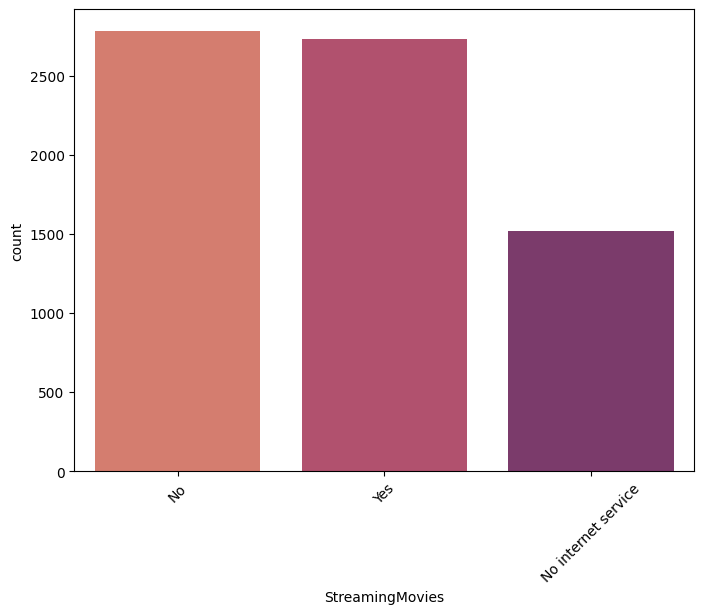

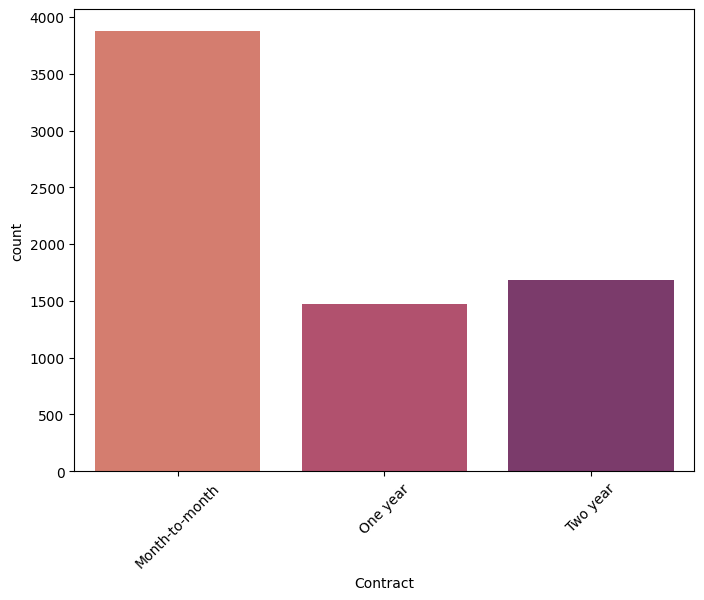

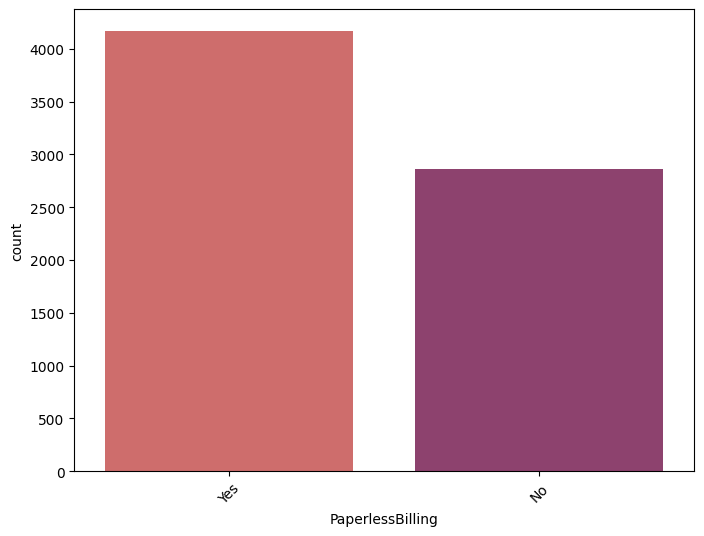

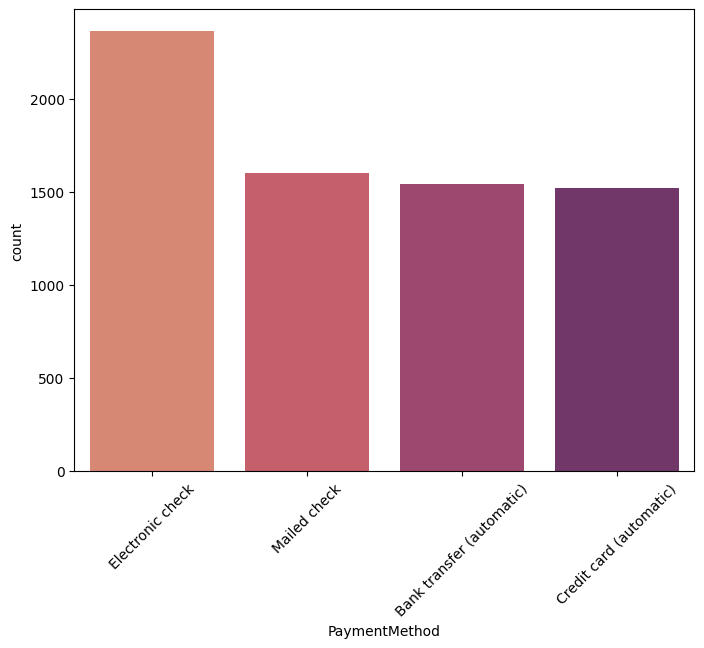

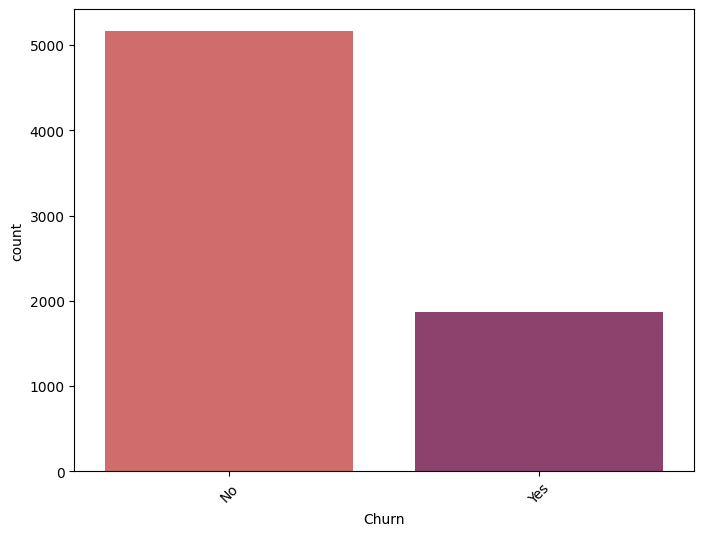

In [ ]:
for column in col:
  plt.figure(figsize=(8,6))
  sns.countplot(data=data, x=column, palette='flare')
  plt.xticks(rotation=45)
  plt.show()

### 📊 **Countplot Explanations**

---

1. **`gender`**

   * Nearly equal distribution between male and female customers.
   * Gender alone may not be a strong predictor of churn.

---

2. **`SeniorCitizen`**

   * Majority of customers are not senior citizens.
   * Indicates the customer base skews younger; may impact tech adoption or contract preferences.

---

3. **`Partner`**

   * More customers without partners than with.
   * Customers with partners may show slightly more loyalty and lower churn risk.

---

4. **`Dependents`**

   * Most customers do not have dependents.
   * Those with dependents might value stability (e.g., longer contracts, lower churn).

---

5. **`PhoneService`**

   * Most customers have phone service.
   * Very few without — may not significantly affect churn.

---

6. **`MultipleLines`**

   * Fairly even split between single and multiple lines (including "No phone service").
   * Could indicate upselling opportunity or dissatisfaction in multi-line users.

---

7. **`InternetService`**

   * Fiber optic and DSL are most common; a small portion has no internet.
   * Fiber users may churn more due to higher charges or speed issues (check against churn).

---

8. **`OnlineSecurity`**

   * Majority of customers do not use this service.
   * Lack of add-on services may indicate lower engagement or higher churn likelihood.

---

9. **`OnlineBackup`**

   * Similar trend: many customers do not use this feature.
   * Add-on usage can indicate higher value customers.

---

10. **`DeviceProtection`**

* More customers opt out than opt in.
* Might be cross-sold with churn mitigation in mind.

---

11. **`TechSupport`**

* Many customers do not subscribe to tech support.
* Lack of support may correlate with dissatisfaction and higher churn.

---

12. **`StreamingTV`**

* Balanced split between users and non-users.
* Entertainment features may retain customers if bundled.

---

13. **`StreamingMovies`**

* Similar distribution as StreamingTV.
* Consider comparing churn across these users.

---

14. **`Contract`**

* **Month-to-month contracts dominate**, followed by one-year and two-year.
* Month-to-month customers are most likely to churn due to flexibility.

---

15. **`PaperlessBilling`**

* More customers opt for paperless billing.
* Paperless users may skew younger and churn more often (check correlation).

---

16. **`PaymentMethod`**

* Electronic Check is the most used method — may also correlate with high churn.
* Credit card and bank transfer users may be more loyal or long-term.

---

17. **`Churn`**

* The dataset is **imbalanced** — majority of customers have not churned.
* Justifies use of SMOTE or class\_weight in modeling.

---


Here rather than using `tenure` for analysis we can use `tenure group` to make analysis more understandable.

In [ ]:
max(data.tenure),min(data.tenure)

(72, 1)

In [ ]:
bin = 1,10,20,30,40,50,60,70,80
labels = ['0-10 months','10-20 months','20-30 months','30-40 months','40-50 months','50-60 months','60-70 months','70+ months']
data['tenure_group'] = pd.cut(data['tenure'], bins=bin, labels=labels, right=False)

In [ ]:
data['tenure_group'].value_counts()

,count
tenure_group,
0-10 months,1843
10-20 months,953
60-70 months,832
20-30 months,762
50-60 months,690
30-40 months,653
70+ months,651
40-50 months,648


In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-10 months
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,30-40 months
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-10 months
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,40-50 months
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-10 months


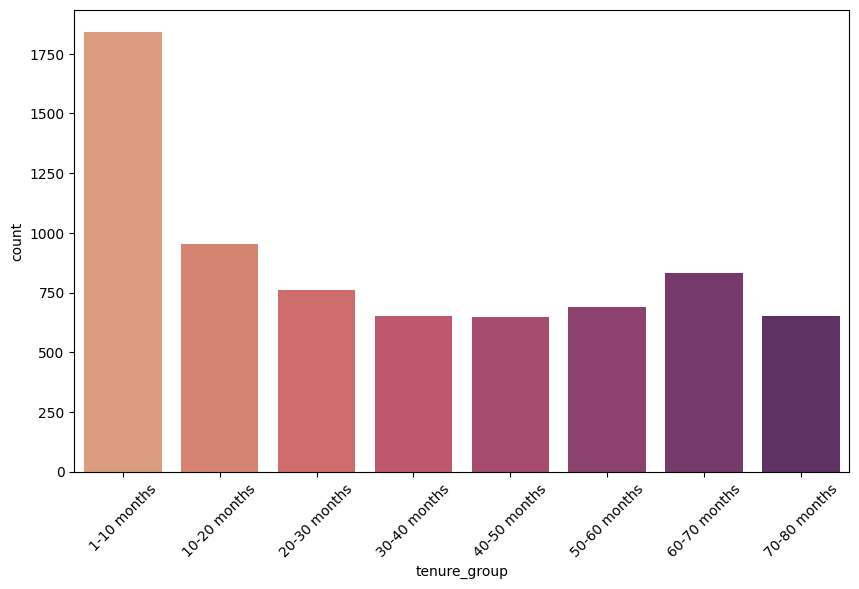

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='tenure_group', palette='flare')
plt.xticks(rotation=45)
plt.show()


The bar plot shows the distribution of customers across different tenure ranges.
A majority of customers (over 1,800) fall into the 1–10 months group, indicating a large number of new or short-term customers.
As tenure increases, the number of customers in each group declines, stabilizing somewhat between 20–70 months.
This suggests that many customers either leave early or that customer acquisition is recent and churn is high in early stages.
The 60–70 month group shows a spike, possibly indicating loyal or long-term users.

---

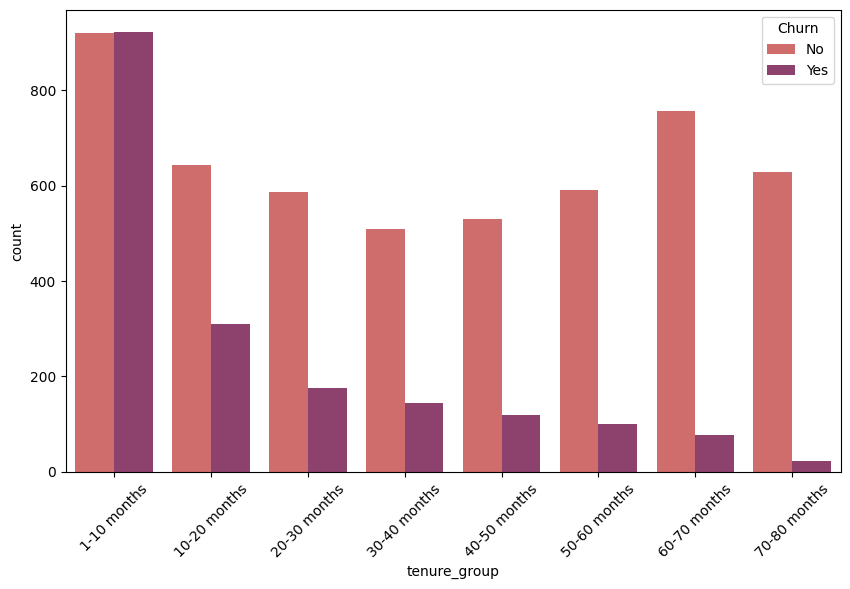

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='tenure_group', palette='flare', hue='Churn')
plt.xticks(rotation=45)
plt.show()

This grouped bar chart breaks down churn (Yes/No) by tenure group.
The 1–10 month group has the highest churn count, with churned and retained customers nearly equal — highlighting that early tenure is high-risk.
As tenure increases, churn count drops significantly, while the count of retained customers increases.
Very few long-tenure customers (60–80 months) have churned, indicating that long-term customers are more likely to stay.
This supports a key business insight: focusing on early customer engagement and onboarding can significantly reduce churn.

---

## **Bivariate  Analysis**

In [ ]:
# visualizing avg metrics for tenure, monthly charges and total charges for comparing between churned vs retained customers
churned_table = data.groupby(data.Churn).agg({'MonthlyCharges':['mean'],'TotalCharges':['mean'], 'tenure':['mean'], 'customerID':['count']})
churned_table

,MonthlyCharges,TotalCharges,tenure,customerID
,mean,mean,mean,count
Churn,,,,
No,61.307408,2555.344141,37.650010,5163
Yes,74.441332,1531.796094,17.979133,1869


In [ ]:
# Flatten columns
churned_table.columns = ['_'.join(col).strip() for col in churned_table.columns.values]
churned_table.reset_index(inplace=True)

In [ ]:
churned_table

,Churn,MonthlyCharges_mean,TotalCharges_mean,tenure_mean,customerID_count
0,No,61.307408,2555.344141,37.650010,5163
1,Yes,74.441332,1531.796094,17.979133,1869


In [ ]:
melted = churned_table.melt(id_vars='Churn', value_vars=['MonthlyCharges_mean', 'TotalCharges_mean', 'tenure_mean'],
                            var_name='Metric', value_name='Average')

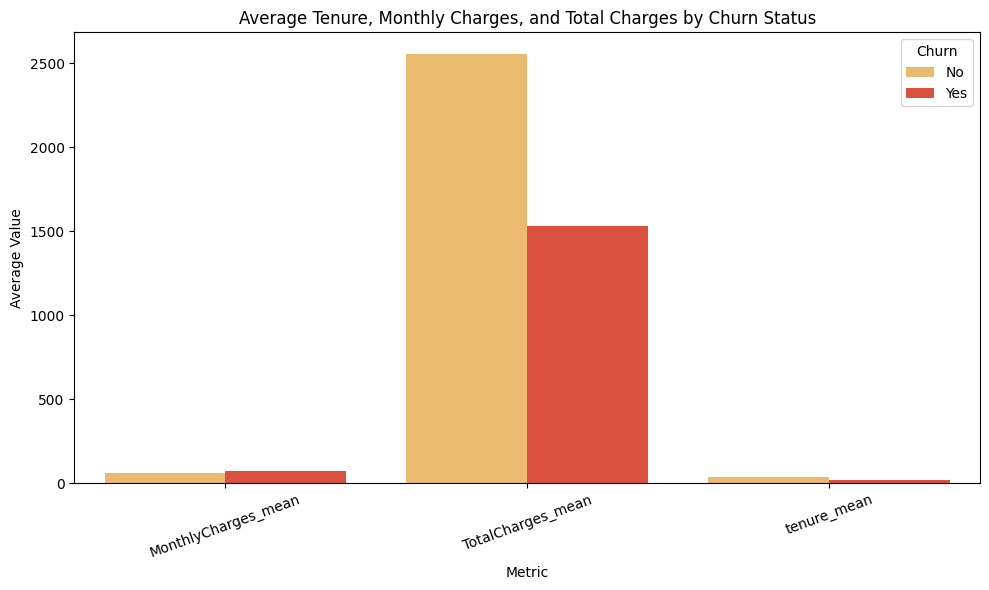

In [ ]:
# Create barplot
plt.figure(figsize=(10,6))
sns.barplot(data=melted, x='Metric', y='Average', hue='Churn', palette='YlOrRd')
plt.title('Average Tenure, Monthly Charges, and Total Charges by Churn Status')
plt.xlabel('Metric')
plt.ylabel('Average Value')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

The graph highlights crucial differences between churned and retained customers:

* Total Charges and Tenure are strong indicators of churn. Customers with lower
total charges and shorter tenures are more likely to churn. This suggests that customers who haven't accumulated significant total charges (often due to shorter tenure) are at higher risk.

* Monthly Charges show a counter-intuitive trend: While retained customers have higher total charges (due to longer tenure), churned customers have slightly higher average monthly charges. This could imply that customers paying higher monthly fees but not staying long enough to accumulate significant total charges are more prone to churn, perhaps due to dissatisfaction with the value for money or finding better deals elsewhere.

---

## **Correlation**

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-10 months
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,30-40 months
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-10 months
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,40-50 months
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-10 months


In [ ]:
df = data.drop(columns=['customerID','tenure_group'], axis=1)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
column = ['gender', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

In [ ]:
#Here label encoder is used to convert the categorical column to numerical column
le = LabelEncoder()
for col in column:
    df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
correlation_mat = df.corr()
correlation_mat

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.006908,-0.002236,-0.014899,-0.011920,0.001348,-0.006695,-0.005624,-0.008920,0.000095,-0.011902,0.016942,-0.013779,0.000048,-0.008545
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.146287,-0.032160,-0.127937,-0.013355,-0.021124,-0.151007,0.031019,0.047088,-0.141820,0.156258,-0.038158,0.219874,0.102411,0.150541
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142717,0.000513,0.150610,0.153045,0.165614,0.126488,0.136679,0.129907,0.294094,-0.013957,-0.156232,0.097825,0.319072,-0.149982
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024975,0.044030,0.151198,0.090231,0.079723,0.132530,0.046214,0.022088,0.240556,-0.110131,-0.041989,-0.112343,0.064653,-0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.343673,-0.029835,0.327283,0.372434,0.372669,0.324729,0.290572,0.296785,0.676734,0.004823,-0.370087,0.246862,0.825880,-0.354049
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,-0.020504,0.387266,-0.014163,0.024040,0.004718,-0.018136,0.056393,0.043025,0.003019,0.016696,-0.005499,0.248033,0.113008,0.011691
MultipleLines,-0.006908,0.146287,0.142717,-0.024975,0.343673,-0.020504,1.000000,-0.108849,0.007306,0.117276,0.122614,0.010941,0.175403,0.181705,0.111029,0.165306,-0.176598,0.433905,0.453202,0.038043
InternetService,-0.002236,-0.032160,0.000513,0.044030,-0.029835,0.387266,-0.108849,1.000000,-0.028003,0.036735,0.045558,-0.025626,0.108190,0.097967,0.099579,-0.138166,0.084504,-0.322173,-0.175691,-0.047097
OnlineSecurity,-0.014899,-0.127937,0.150610,0.151198,0.327283,-0.014163,0.007306,-0.028003,1.000000,0.184942,0.175789,0.284875,0.044399,0.056313,0.373980,-0.157723,-0.096593,-0.053576,0.254473,-0.289050
OnlineBackup,-0.011920,-0.013355,0.153045,0.090231,0.372434,0.024040,0.117276,0.036735,0.184942,1.000000,0.187646,0.195581,0.147085,0.137083,0.280617,-0.012697,-0.125534,0.119943,0.375556,-0.195290


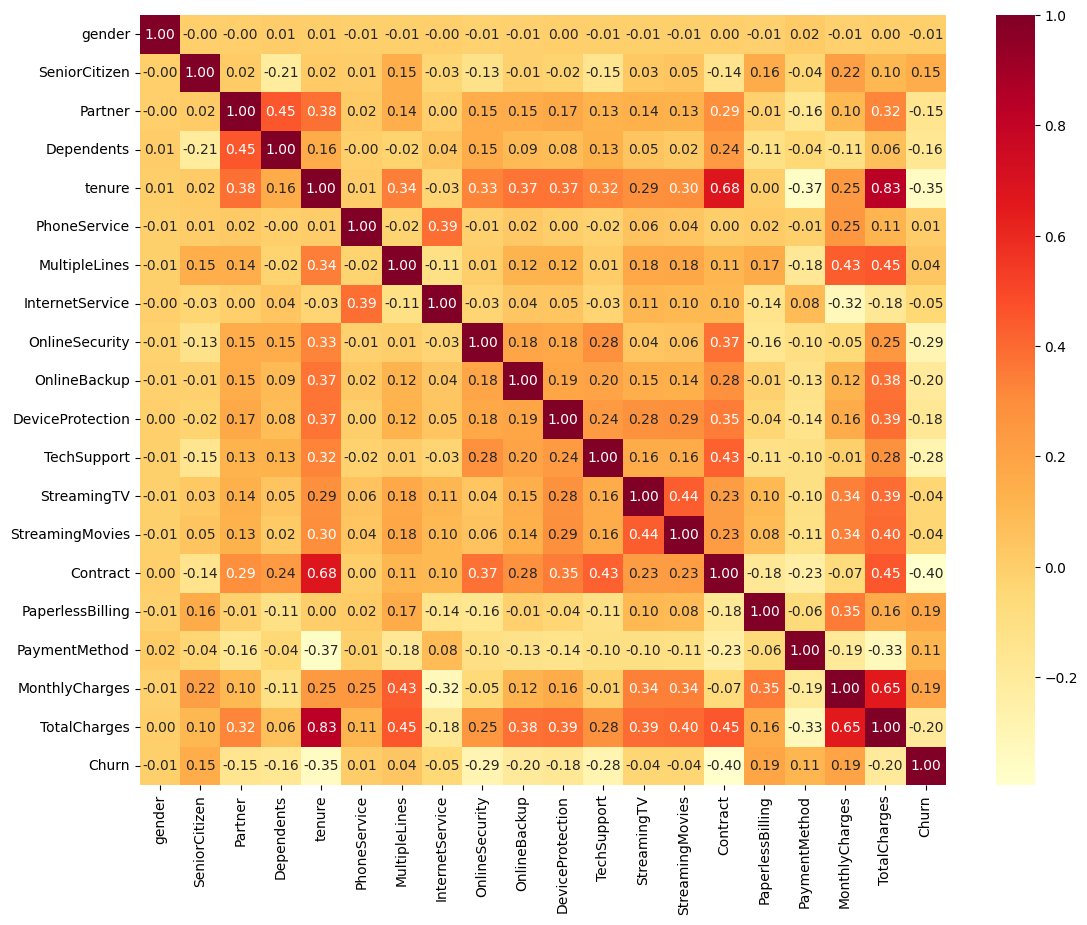

In [ ]:
plt.figure(figsize=(13,10))
sns.heatmap(correlation_mat,annot=True,cmap='YlOrRd',fmt='.2f')
plt.show()

Key Insights for Correlation graph:

Positive Correlation with Churn: 'MonthlyCharges' and 'PaperlessBilling' show a slight positive link to churn (higher values, higher churn risk).

Strong Negative Correlation with Churn (Retention Factors):

'Tenure', 'TotalCharges', and 'Contract' are strongly negatively correlated with churn. This means customers with longer tenure, higher total accumulated charges, and longer contract terms are significantly less likely to churn.

Several 'InternetService' features (e.g., 'OnlineSecurity', 'TechSupport') also negatively correlate with churn, suggesting these services aid retention.

Feature Relationships:

'Tenure' and 'TotalCharges' are highly correlated, as expected (longer stay = more total charges).

'MonthlyCharges' also positively correlates with 'TotalCharges' and various internet services.

---



In [ ]:
corr_mat = df.corr()
targeted = corr_mat['Churn'].drop('Churn')

In [ ]:
target_sort = targeted.sort_values(ascending=False)

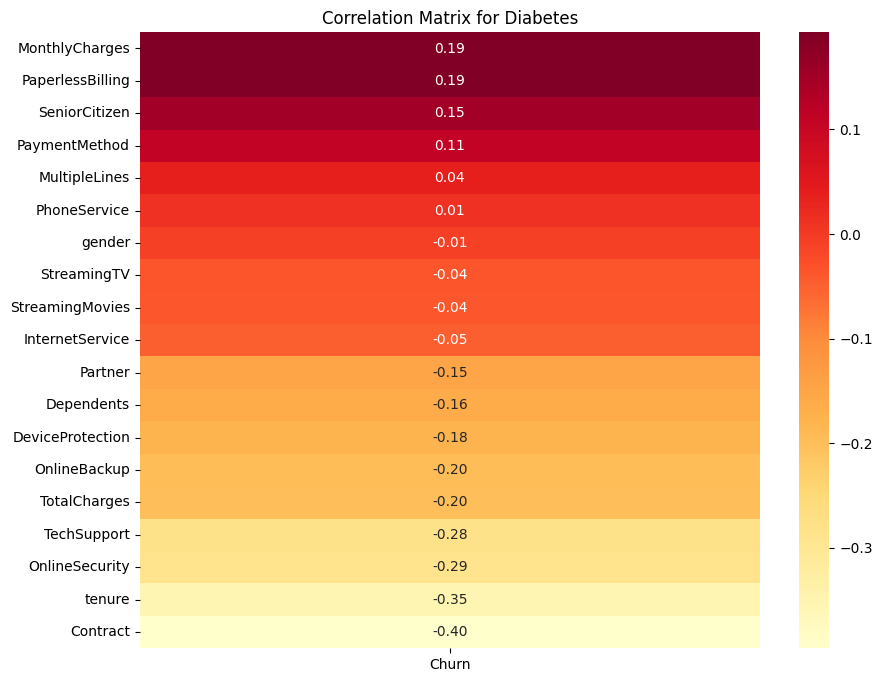

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(target_sort.to_frame(),annot=True,cmap='YlOrRd',fmt='.2f')
plt.title("Correlation Matrix for Diabetes")
plt.show()

**Strongest Positive Correlations with Churn (Top of the list, darker red):**

* MonthlyCharges (0.19) and PaperlessBilling (0.19) show the highest positive correlation with churn. This suggests that customers with higher monthly charges and those who use paperless billing are slightly more likely to churn.

* SeniorCitizen (0.15) and PaymentMethod (0.11) also have a positive, though weaker, correlation.

**Strongest Negative Correlations with Churn (Bottom of the list, lighter yellow):**

* Contract (-0.40) and Tenure (-0.35) have the strongest negative correlation with churn. This indicates that customers with longer contract terms and longer tenures are significantly less likely to churn.

* OnlineSecurity (-0.29), TechSupport (-0.28), TotalCharges (-0.20), and OnlineBackup (-0.20) also show significant negative correlations, meaning customers utilizing these services or having higher total charges are less likely to churn.

---

## **Predictive Analysis**

In [ ]:
x = df.drop('Churn', axis=1) #independent varidable
y = df['Churn'] #dependent variable

In [ ]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [ ]:
y.head()

,Churn
0,0
1,0
2,1
3,0
4,1


In [ ]:
#using standard scaler to standardize the features
#It transforms numerical data so that each feature has a mean of 0 and a standard deviation of 1.
ss = StandardScaler()
ss_x = ss.fit_transform(x)

In [ ]:
ss_x

array([[-1.00943013, -0.44032709,  1.03561683, ...,  0.39980518,
        -1.16169394, -0.99419409],
       [ 0.99065797, -0.44032709, -0.9656081 , ...,  1.33663626,
        -0.26087792, -0.17373982],
       [ 0.99065797, -0.44032709, -0.9656081 , ...,  1.33663626,
        -0.36392329, -0.95964911],
       ...,
       [-1.00943013, -0.44032709,  1.03561683, ...,  0.39980518,
        -1.17000405, -0.85451414],
       [ 0.99065797,  2.27103902,  1.03561683, ...,  1.33663626,
         0.31916782, -0.87209546],
       [ 0.99065797, -0.44032709, -0.9656081 , ..., -1.47385696,
         1.35793167,  2.01234407]])

In [ ]:
#Split the data into tran and test set using train_test_split()
xtrain,xtest,ytrain,ytest = train_test_split(ss_x,y,random_state=42,stratify=y,test_size=0.2)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((5625, 19), (1407, 19), (5625,), (1407,))

### **Model Building**

Here we wil be using different machine learning model such as  `RandomForestClassifier`, `LogisticRegression`,`DecisionTreeClassifer`,etc.
then we will try to fin which model is performing well on imbalanced dataset. And finally we can use same model for prediction on churn and present it in power bi to make interpretation more easy.

In [ ]:
rf = RandomForestClassifier(n_estimators=500,random_state=42,max_features="sqrt",
                            max_depth=10,min_samples_split=2)

rf.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=10, n_estimators=500, random_state=42)

In [ ]:
ypred_rf = rf.predict(xtest)

In [ ]:
acc_rf = accuracy_score(ytest,ypred_rf)
print("Accuracy Score : ",acc_rf)

prec_rf = precision_score(ytest,ypred_rf)
print("\nPrecision Score : ",prec_rf)

rec_rf = recall_score(ytest,ypred_rf)
print("\nRecall Score : ",rec_rf)

f1_rf = f1_score(ytest,ypred_rf)
print("\nF1 Score : ",f1_rf)

confusion_rf = confusion_matrix(ytest,ypred_rf)
print("\nConfusion Matrix : \n",confusion_rf)

report_rf = classification_report(ytest,ypred_rf)
print("\nClassification Report : \n",report_rf)

Accuracy Score :  0.7867803837953091

Precision Score :  0.625

Recall Score :  0.4946524064171123

F1 Score :  0.5522388059701493

Confusion Matrix : 
 [[922 111]
 [189 185]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [ ]:
xgb = XGBClassifier(n_estimators=50, use_label_encoder=False, eval_metric='logloss', random_state=42,
                    gamma=5, learning_rate=0.1, max_depth=6)

xgb.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=5, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
ypred_xgb = xgb.predict(xtest)

In [ ]:
acc_xgb = accuracy_score(ytest,ypred_xgb)
print("Accuracy Score : ",acc_xgb)

prec_xgb = precision_score(ytest,ypred_xgb)
print("\nPrecision Score : ",prec_xgb)

rec_xgb = recall_score(ytest,ypred_xgb)
print("\nRecall Score : ",rec_xgb)

f1_xgb = f1_score(ytest,ypred_xgb)
print("\nF1 Score : ",f1_xgb)

confusion_xgb = confusion_matrix(ytest,ypred_xgb)
print("\nConfusion Matrix : \n",confusion_xgb)

report_xgb = classification_report(ytest,ypred_xgb)
print("\nClassification Report : \n",report_xgb)

Accuracy Score :  0.8002842928216063

Precision Score :  0.6576271186440678

Recall Score :  0.5187165775401069

F1 Score :  0.5799701046337817

Confusion Matrix : 
 [[932 101]
 [180 194]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.66      0.52      0.58       374

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [ ]:
lr = LogisticRegression(max_iter=1000)

lr.fit(xtrain,ytrain)

LogisticRegression(max_iter=1000)

In [ ]:
ypred_lr = lr.predict(xtest)

In [ ]:
acc_lr = accuracy_score(ytest,ypred_lr)
print("Accuracy Score : ",acc_lr)

prec_lr = precision_score(ytest,ypred_lr)
print("\nPrecision Score : ",prec_lr)

rec_lr = recall_score(ytest,ypred_lr)
print("\nRecall Score : ",rec_lr)

f1_lr = f1_score(ytest,ypred_lr)
print("\nF1 Score : ",f1_lr)

confusion_lr = confusion_matrix(ytest,ypred_lr)
print("\nConfusion Matrix : \n",confusion_lr)

report_lr = classification_report(ytest,ypred_lr)
print("\nClassification Report : \n",report_lr)

Accuracy Score :  0.7938877043354655

Precision Score :  0.6242603550295858

Recall Score :  0.5641711229946524

F1 Score :  0.5926966292134831

Confusion Matrix : 
 [[906 127]
 [163 211]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.88      0.86      1033
           1       0.62      0.56      0.59       374

    accuracy                           0.79      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.79      0.79      1407



In [ ]:
dt = DecisionTreeClassifier()

dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [ ]:
ypred_dt = dt.predict(xtest)

In [ ]:
acc_dt = accuracy_score(ytest,ypred_dt)
print("Accuracy Score : ",acc_dt)

prec_dt = precision_score(ytest,ypred_dt)
print("\nPrecision Score : ",prec_dt)

rec_dt = recall_score(ytest,ypred_dt)
print("\nRecall Score : ",rec_dt)

f1_dt = f1_score(ytest,ypred_dt)
print("\nF1 Score : ",f1_dt)

confusion_dt = confusion_matrix(ytest,ypred_dt)
print("\nConfusion Matrix : \n",confusion_dt)

report_dt = classification_report(ytest,ypred_dt)
print("\nClassification Report : \n",report_dt)

Accuracy Score :  0.7192608386638237

Precision Score :  0.4746987951807229

Recall Score :  0.5267379679144385

F1 Score :  0.49936628643852976

Confusion Matrix : 
 [[815 218]
 [177 197]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.79      0.80      1033
           1       0.47      0.53      0.50       374

    accuracy                           0.72      1407
   macro avg       0.65      0.66      0.65      1407
weighted avg       0.73      0.72      0.72      1407



In [ ]:
models = [
    ['Decision Tree', acc_dt, prec_dt, rec_dt, f1_dt],
    ['Random Forest', acc_rf, prec_rf, rec_rf, f1_rf],
    ['XGBoost', acc_xgb, prec_xgb, rec_xgb, f1_xgb],
    ['Logistic Regression', acc_lr, prec_lr, rec_lr, f1_lr]
]
columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']

model_data = pd.DataFrame(models, columns=columns)
print(model_data)

                 Model  Accuracy  Precision    Recall  F1 Score
0        Decision Tree  0.719261   0.474699  0.526738  0.499366
1        Random Forest  0.786780   0.625000  0.494652  0.552239
2              XGBoost  0.800284   0.657627  0.518717  0.579970
3  Logistic Regression  0.793888   0.624260  0.564171  0.592697


In [ ]:
results = pd.DataFrame({
    'Model': ['XGBoost'],
    'Accuracy': [round(acc_xgb, 6)],
    'Precision': [round(prec_xgb, 6)],
    'Recall': [round(rec_xgb, 6)],
    'F1 Score': [round(f1_xgb, 6)]
})

# Display the table
print(results)

     Model  Accuracy  Precision    Recall  F1 Score
0  XGBoost  0.800284   0.657627  0.518717   0.57997


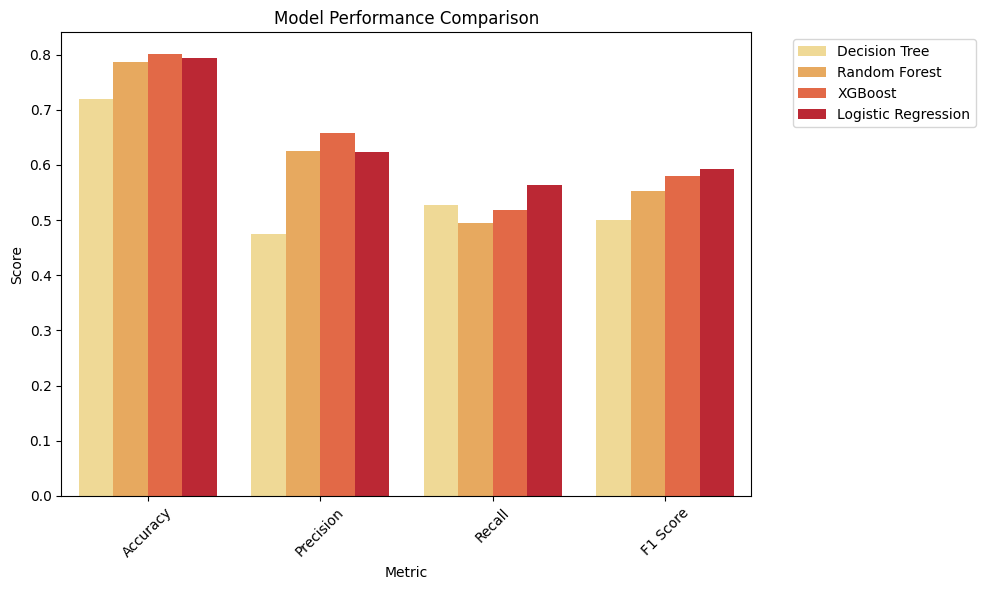

In [ ]:
# Prepare data for plotting
df_melted = model_data.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='Metric', y='Score', hue='Model', palette='YlOrRd')
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

From above diagram and table that represents accuracy,presision,recall adn f1score for different models like `DecisionTree, RandomForest, XgBosst and LogisticRegression`. So from that diagram and table :

| Model               | Accuracy | Precision | Recall | F1 Score |
|---------------------|----------|-----------|--------|----------|
| Decision Tree       | 0.719261 | 0.474699  | 0.526738 | 0.499366 |
| Random Forest       | 0.786780 | 0.625000  | 0.494652 | 0.552239 |
| XGBoost             | 0.800284 | 0.657627  | 0.518717 | 0.579970 |
| Logistic Regression | 0.793888 | 0.624260  | 0.564171 | 0.592697 |

we can conclude that xgboost and logistic regression are better model than other two so there are two option like we can combine them or else we can use one of them. But i think going with just Xgboost will be better than using combination of Xgboost and LogistcRegression.

---

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-10 months
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,30-40 months
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-10 months
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,40-50 months
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-10 months


## **Data preparation for Power Bi**

In [ ]:
#Use MonthlyCharges × Tenure to estimate Customer Lifetime Value (CLV):
# Create estimated Customer Lifetime Value (CLV)

data['CLV'] = data['MonthlyCharges'] * data['tenure']

In [ ]:
# Segment customers into 3 bins: Low, Medium, High

data['CustomerSegment'] = pd.qcut(data['CLV'], q=3, labels=['Low Value', 'Medium Value', 'High Value'])

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,CLV,CustomerSegment
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-10 months,29.85,Low Value
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,30-40 months,1936.30,Medium Value
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-10 months,107.70,Low Value
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,40-50 months,1903.50,Medium Value
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-10 months,141.40,Low Value


In [ ]:
# Export for Power BI

data[['customerID', 'MonthlyCharges', 'tenure', 'CLV', 'CustomerSegment']].to_csv('customer_value_segment.csv', index=False)

In [ ]:
for col in data.select_dtypes(include=['object','category']):
    if col != 'customerID':
        data[col] = le.fit_transform(data[col])

In [ ]:
data.dtypes

,0
customerID,object
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
InternetService,int64
OnlineSecurity,int64


In [ ]:
X = data.drop(columns=['customerID','Churn', 'tenure_group'])

Y = data['Churn']

In [ ]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,CLV,CustomerSegment
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,29.85,1
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,1936.30,2
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,107.70,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,1903.50,2
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,141.40,1


In [ ]:
Y.head()

,Churn
0,0
1,0
2,1
3,0
4,1


In [ ]:
#using standard scalar to standardize the features
ss_X = ss.fit_transform(X)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(ss_X, Y, stratify=Y, random_state=42)

The goal is to balance the class distribution in your training set. If, for example, you have a churn dataset where only 20% of customers churn (minority class), SMOTE will generate new "churned" customer data points to bring their count closer to the "retained" customers, preventing your model from being biased towards the majority class.

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, Y_train)

In [ ]:
xgb_clf = XGBClassifier(n_estimators=50, use_label_encoder=False, eval_metric='logloss', random_state=42,
                    gamma=5, learning_rate=0.1, max_depth=6, class_weight = 'balanced')

xgb_clf.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight='balanced', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=5,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
y_pred = xgb_clf.predict(X_test)
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[1045  246]
 [ 142  325]]
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1291
           1       0.57      0.70      0.63       467

    accuracy                           0.78      1758
   macro avg       0.72      0.75      0.73      1758
weighted avg       0.80      0.78      0.79      1758



In [ ]:
# Ensure these columns are in your df
data['ChurnRisk'] = xgb_clf.predict(X)

data['ChurnProbability'] = xgb_clf.predict_proba(X)[:, 1]

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,CLV,CustomerSegment,ChurnRisk,ChurnProbability
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0,0,29.85,1,1,0.925205
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0,3,1936.30,2,1,0.855941
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1,0,107.70,1,1,0.911925
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0,4,1903.50,2,1,0.901326
4,9237-HQITU,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1,0,141.40,1,1,0.884437


In [ ]:
data.ChurnRisk.value_counts()

,count
ChurnRisk,
1,5347
0,1685


In [ ]:
df_export = data[['customerID', 'tenure', 'MonthlyCharges', 'ChurnRisk', 'ChurnProbability']]

# Save to CSV (no index)
df_export.to_csv('churn_predictions.csv', index=False)

# **🏁 Final Conclusion**

Customer Churn Prediction using Python:

This project aimed to predict customer churn using a combination of data preprocessing, exploratory analysis, and machine learning models. Here are the key outcomes:

✅ Key Findings
* The dataset was imbalanced, with ~26% churned customers. To address this, SMOTE was applied, helping the model better recognize churned customers.

* Label Encoding was used to convert categorical variables into numerical format for modeling.

🤖 Model Performance

XGBoost achieved the best balance of performance:

* Accuracy: 80.0%

* Precision: 65.8%

* Recall: 51.9%

* F1 Score: 57.9%

Logistic Regression showed the highest F1 Score (59.2%) and recall (56.4%), making it suitable when identifying churners is the priority.

📊 Insights from EDA
* Customers with shorter tenure (0–10 months) were far more likely to churn.

* Churn rates were higher among customers with:

* Month-to-Month contracts

* No Tech Support

* Fiber optic internet

* Customers with higher monthly charges but lower tenure were at higher churn risk.

🎯 Business Implications
* Focus retention strategies on:

* Early-stage (0–12 month) customers

* Customers with month-to-month contracts or no tech support

* Use model predictions to prioritize high-risk, high-value customers for retention offers.

